In [1]:
from Functions import *

Sample start date:  2005-07-11 05:17:30 
Sample end date: 2005-07-12 16:34:30
Start Date:  2005-07-11 05:17:30
End Date:  2005-07-12 16:33:30
['2005-07-11 05:34:30', '2005-07-11 11:14:30', '2005-07-11 15:04:30', '2005-07-11 18:33:30', '2005-07-12 09:11:30', '2005-07-12 15:43:30']


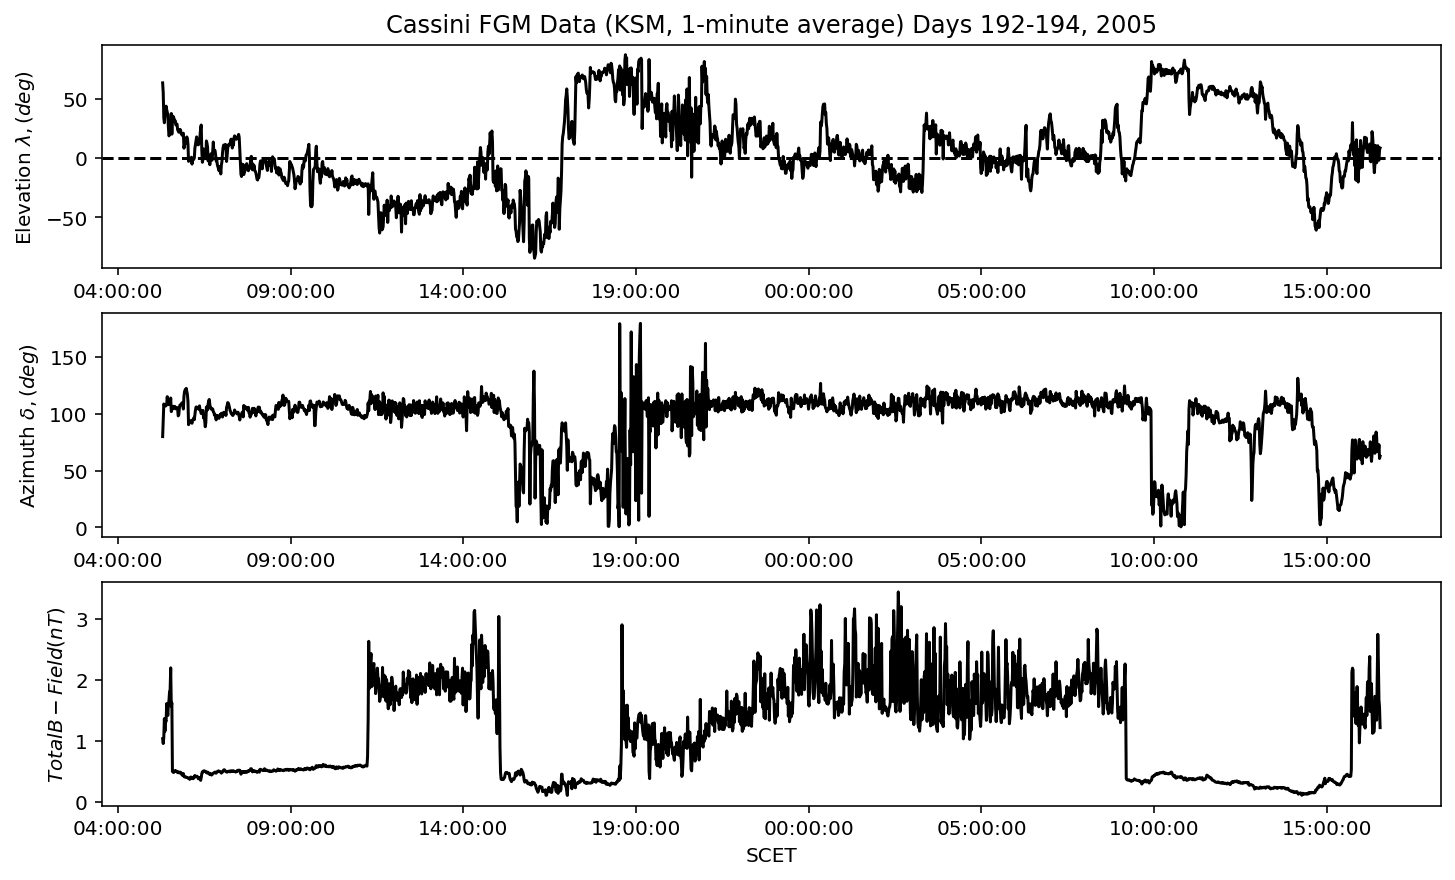

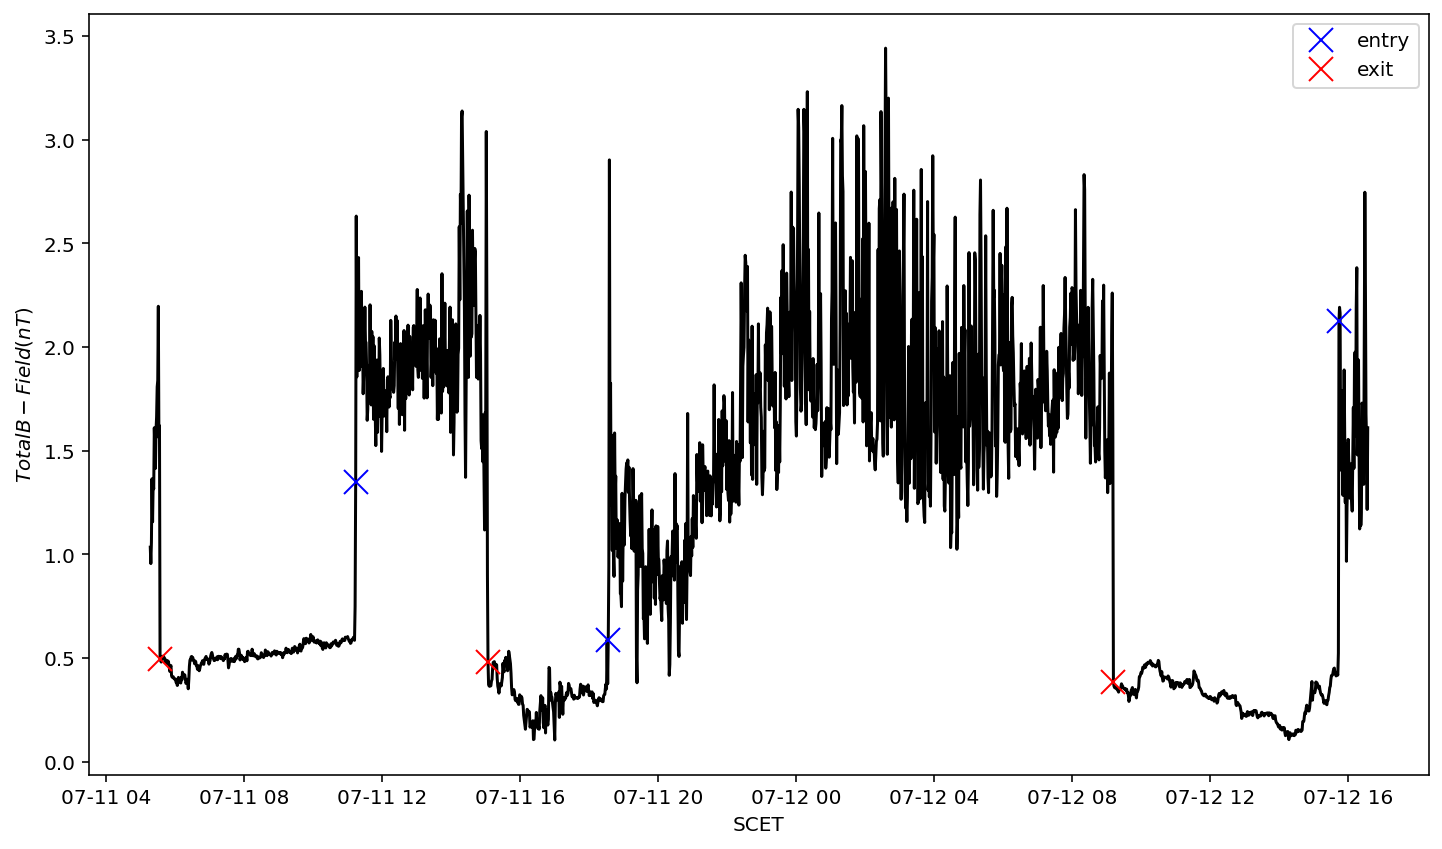

In [2]:
windowsize = 7
estimatedNumCrossings = 6
year= 2005
start_day1 =192.22
end_day1 = 193.69

day_data1_2004 = get_day_data(start_day1, end_day1, year)
plot_KSM(day_data1_2004, year, 192, 194, xFormat = "Hour")
entries1, exits1, ax1, ksmcoords_1,cross_array1 = identify_crossings_2(day_data1_2004, windowsize, estimatedNumCrossings,3,2,100)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day1, end_day1,year),fontsize = 14)

print(cross_array1)

Sample start date:  2005-07-24 17:17:30 
Sample end date: 2005-07-30 00:00:30
['2005-07-24 18:13:30', '2005-07-28 22:12:30', '2005-07-28 23:45:30', '2005-07-29 15:49:30', '2005-07-29 20:37:30']


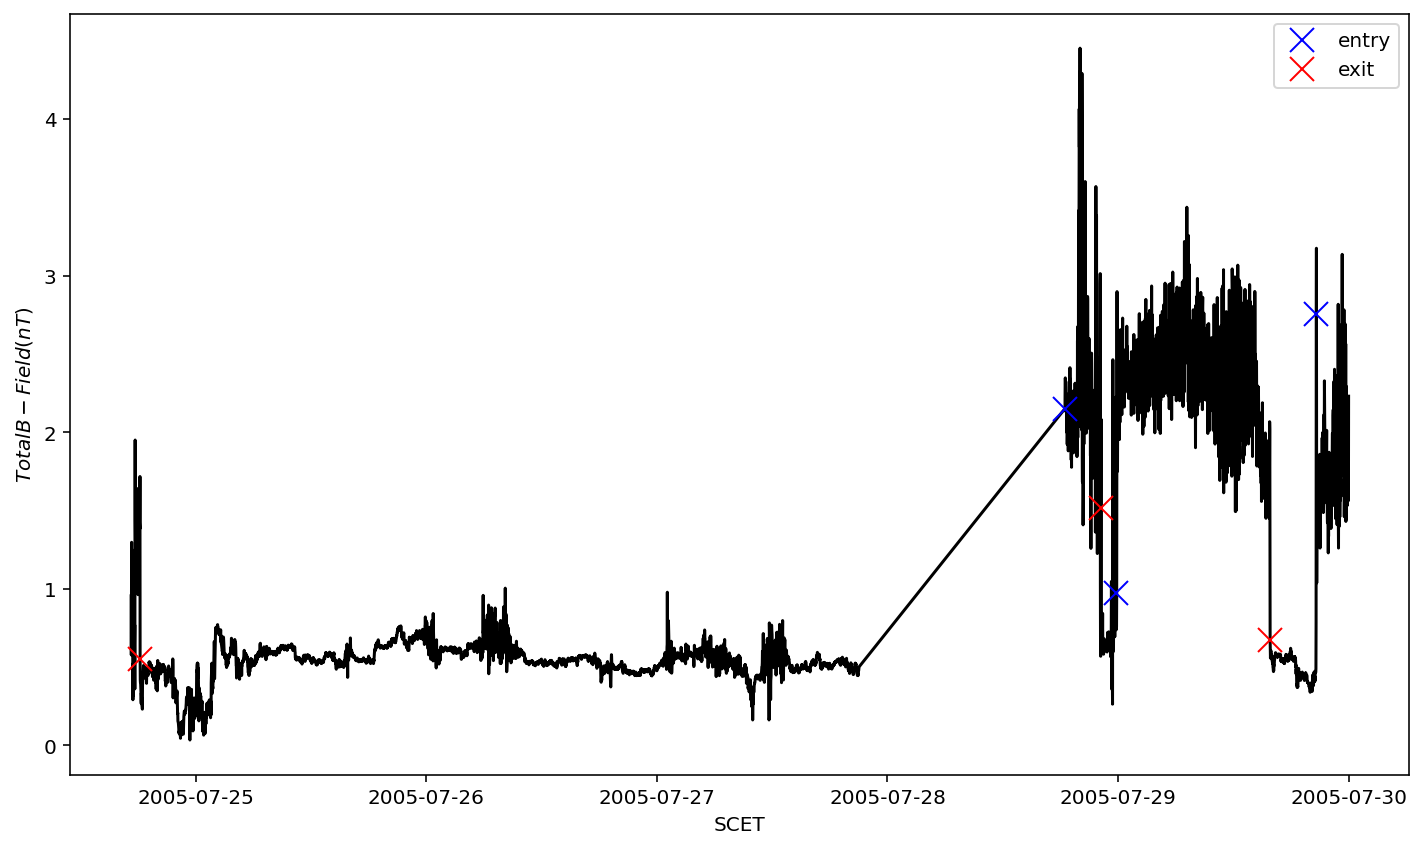

In [3]:
windowsize = 7
estimatedNumCrossings = 4
year = 2005
start_day2 = 205.72
end_day2 = 211
day_data2 = get_day_data(start_day2, end_day2, year)
#plot_KSM(day_data2, year, 205, end_day2, xFormat = "Hour")
entries2, exits2, ax2, ksmcoords_2_2,cross_array2= identify_crossings_2(day_data2, windowsize, estimatedNumCrossings,3,2,310)
plt.title("Crossings Identified (Days {}-{}, {})".format(start_day2, end_day2,year),fontsize = 14)

del cross_array2[1]
print(cross_array2)

In [4]:

cross_array = cross_array1 + cross_array2
print('crossing dates',cross_array)
day_data_2004 = get_day_data(start_day1,end_day2,year)
day_data_2004.index.strftime('%Y-%m-%d %H:%M:%S')


crossing dates ['2005-07-11 05:34:30', '2005-07-11 11:14:30', '2005-07-11 15:04:30', '2005-07-11 18:33:30', '2005-07-12 09:11:30', '2005-07-12 15:43:30', '2005-07-24 18:13:30', '2005-07-28 22:12:30', '2005-07-28 23:45:30', '2005-07-29 15:49:30', '2005-07-29 20:37:30']


Sample start date:  2005-07-11 05:17:30 
Sample end date: 2005-07-30 00:00:30


Index(['2005-07-11 05:17:30', '2005-07-11 05:18:30', '2005-07-11 05:19:30',
       '2005-07-11 05:20:30', '2005-07-11 05:21:30', '2005-07-11 05:22:30',
       '2005-07-11 05:23:30', '2005-07-11 05:24:30', '2005-07-11 05:25:30',
       '2005-07-11 05:26:30',
       ...
       '2005-07-29 23:50:30', '2005-07-29 23:51:30', '2005-07-29 23:52:30',
       '2005-07-29 23:53:30', '2005-07-29 23:54:30', '2005-07-29 23:55:30',
       '2005-07-29 23:56:30', '2005-07-29 23:57:30', '2005-07-29 23:58:30',
       '2005-07-29 23:59:30'],
      dtype='object', name='Time', length=25605)

In [5]:
offset=4
mins=8+offset

b1, b2 = extract_B_vector3(cross_array, day_data_2004, mins,offset)

type1 = ['exit','entry', 'exit', 'entry', 'exit' ,'entry',
         'exit','exit',  'entry', 'exit' ,'entry']
num = np.arange(1, len(cross_array)+1, 1)

ncp,ave_ncp,std_ncp,shock_v,ave_shock, std = ncp_shock3(b1, b2, 8, num, type1)

S=1 θ_BN value = 71.2181776828621
Standard deviation = 6.996709520347994
S=2 θ_BN value = 67.48727132155366
Standard deviation = 4.618403676451726
S=3 θ_BN value = 62.12521413377772
Standard deviation = 11.677170637521808
S=4 θ_BN value = 33.66913806186789
Standard deviation = 18.509844944156562
S=5 θ_BN value = 69.97712341100734
Standard deviation = 14.275558115217835
S=6 θ_BN value = 57.97897844935258
Standard deviation = 11.986355433322622
S=7 θ_BN value = 50.881664495379084
Standard deviation = 18.033863011060483
S=8 θ_BN value = 41.492264457919475
Standard deviation = 7.963427848728041
S=9 θ_BN value = 38.52886280997357
Standard deviation = 20.388013081685006
S=10 θ_BN value = 44.31509415916961
Standard deviation = 6.952161312767278
S=11 θ_BN value = 71.0266968901315
Standard deviation = 12.095148548396214


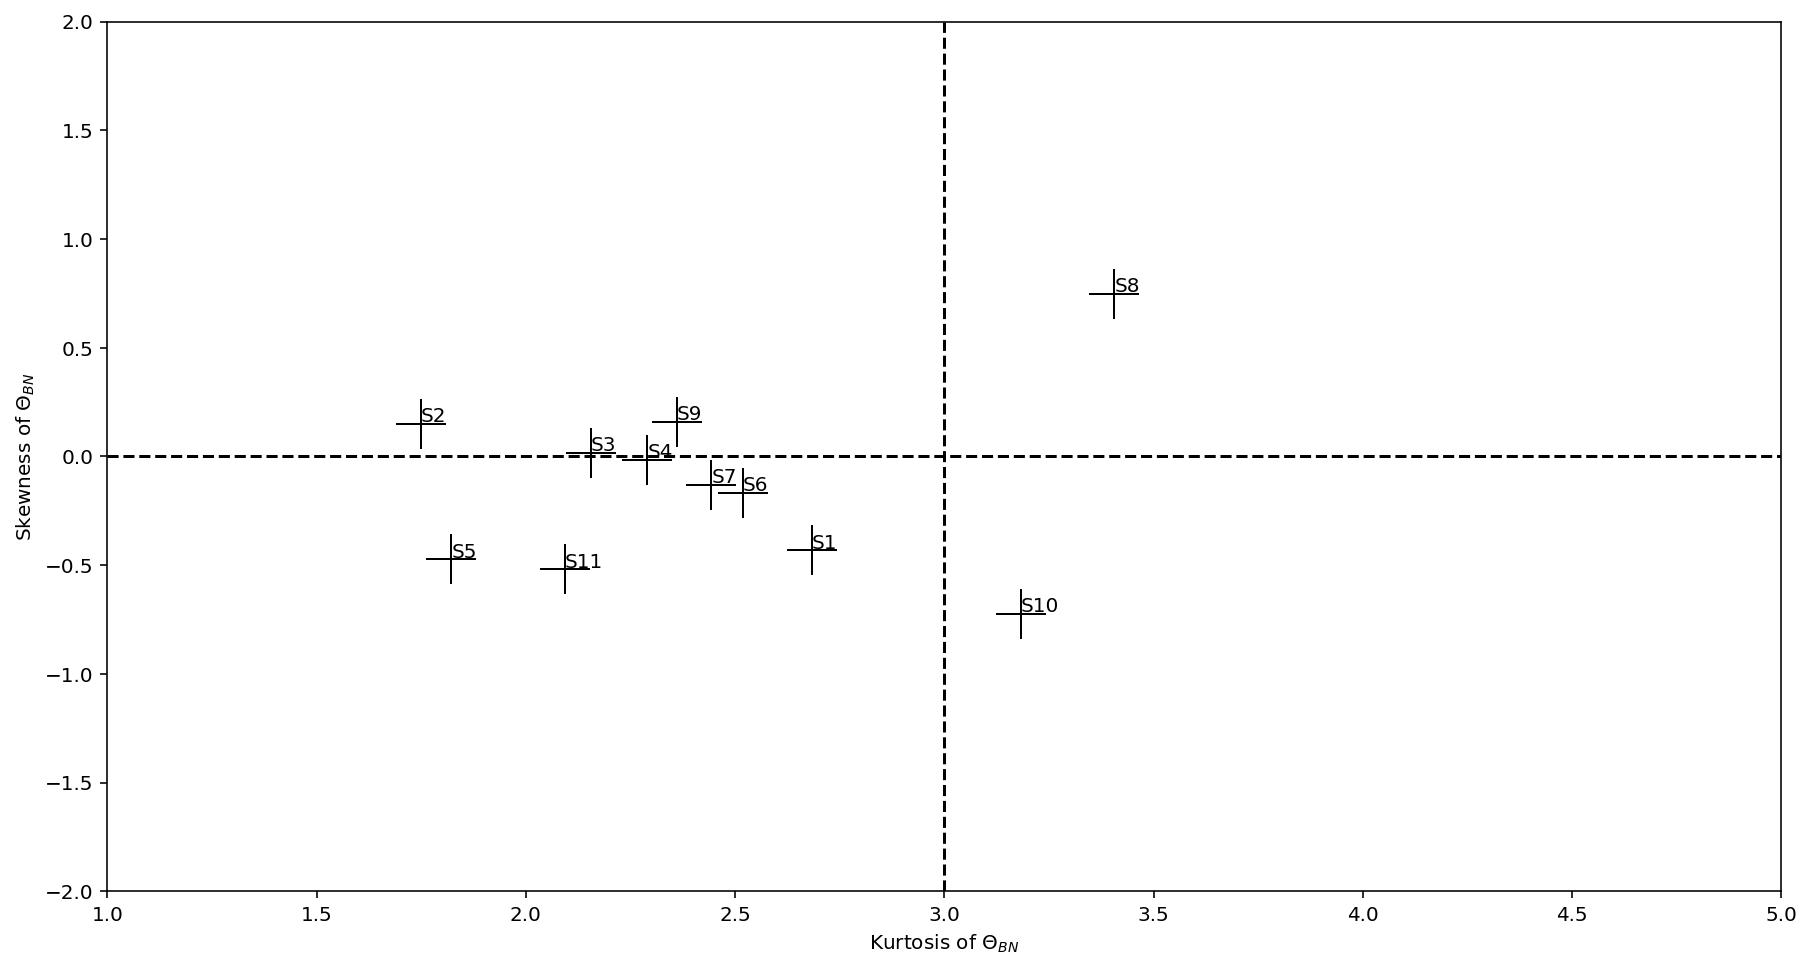

In [6]:
Plot_Dist_for_theta([*shock_v])
plt.title("Kurtosis vs Skewness (Days 192-211, 2005)", fontsize = 15)
plt.xlabel("Kurtosis of ${\Theta}_{BN}$", fontsize = 15)
plt.ylabel("Skewness of ${\Theta}_{BN}$", fontsize = 15)

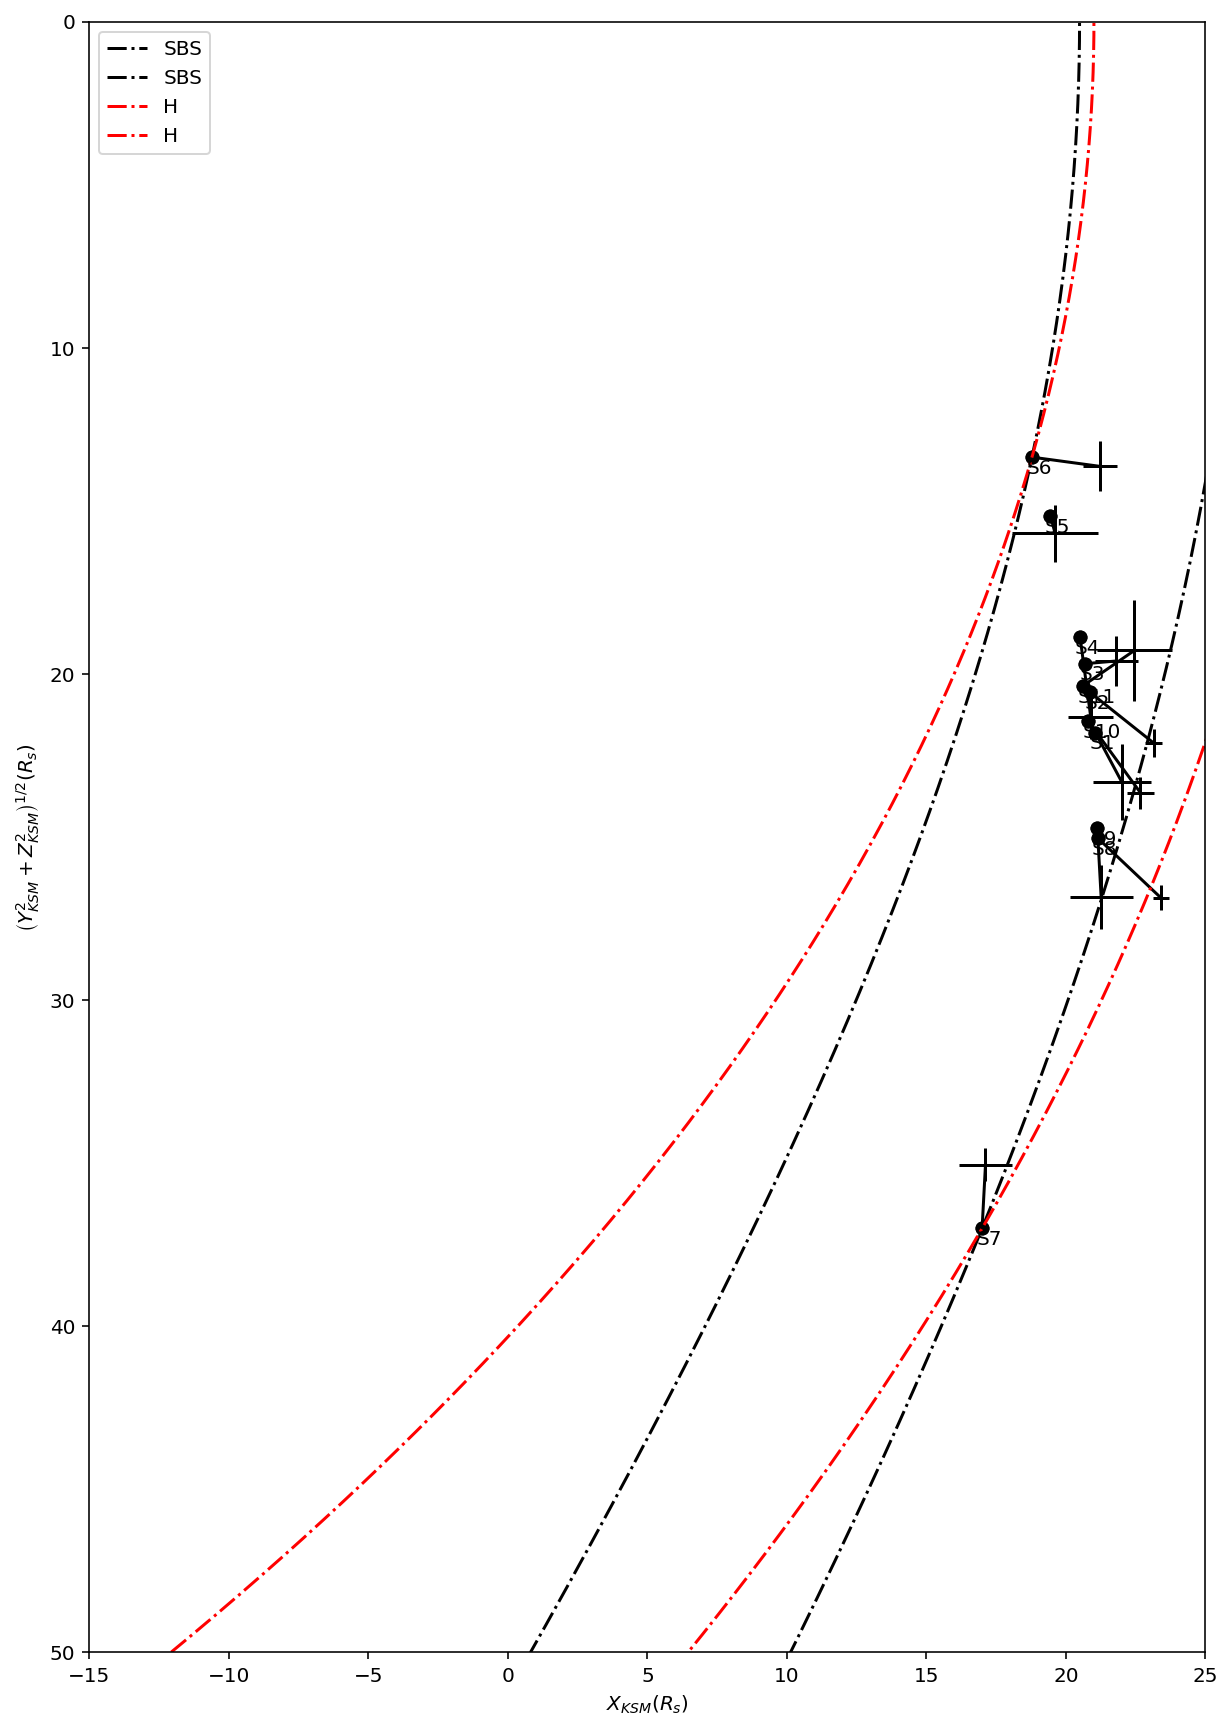

In [10]:
x_ncp,rho_ncp,srho_ncp=plotncp(day_data_2004,cross_array,3,ave_ncp,std_ncp,6,7)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title("Projections of Co-planarity Normals (Days 192-211, 2005)", fontsize = 15)
plt.ylim(0,50)
plt.xlim(-15,25)
plt.gca().invert_yaxis()

Theta_CPM  [34.04473891128699, 10.975702040294706, 26.998005468138743, 58.87634628394569, 52.64701238694602, 11.856741683380946, 59.37679125826202, 12.96059168062375, 60.44077922587897, 25.624519781425178, 53.74044197137849]
Std [19.073569698711907, 6.910747587712032, 16.979271704837743, 16.57830449186986, 28.704126197900205, 15.556178007184243, 21.260713645014228, 5.99444605710605, 24.49894938387681, 8.244045999572965, 23.862342506724794]


(20.5, 22.0)

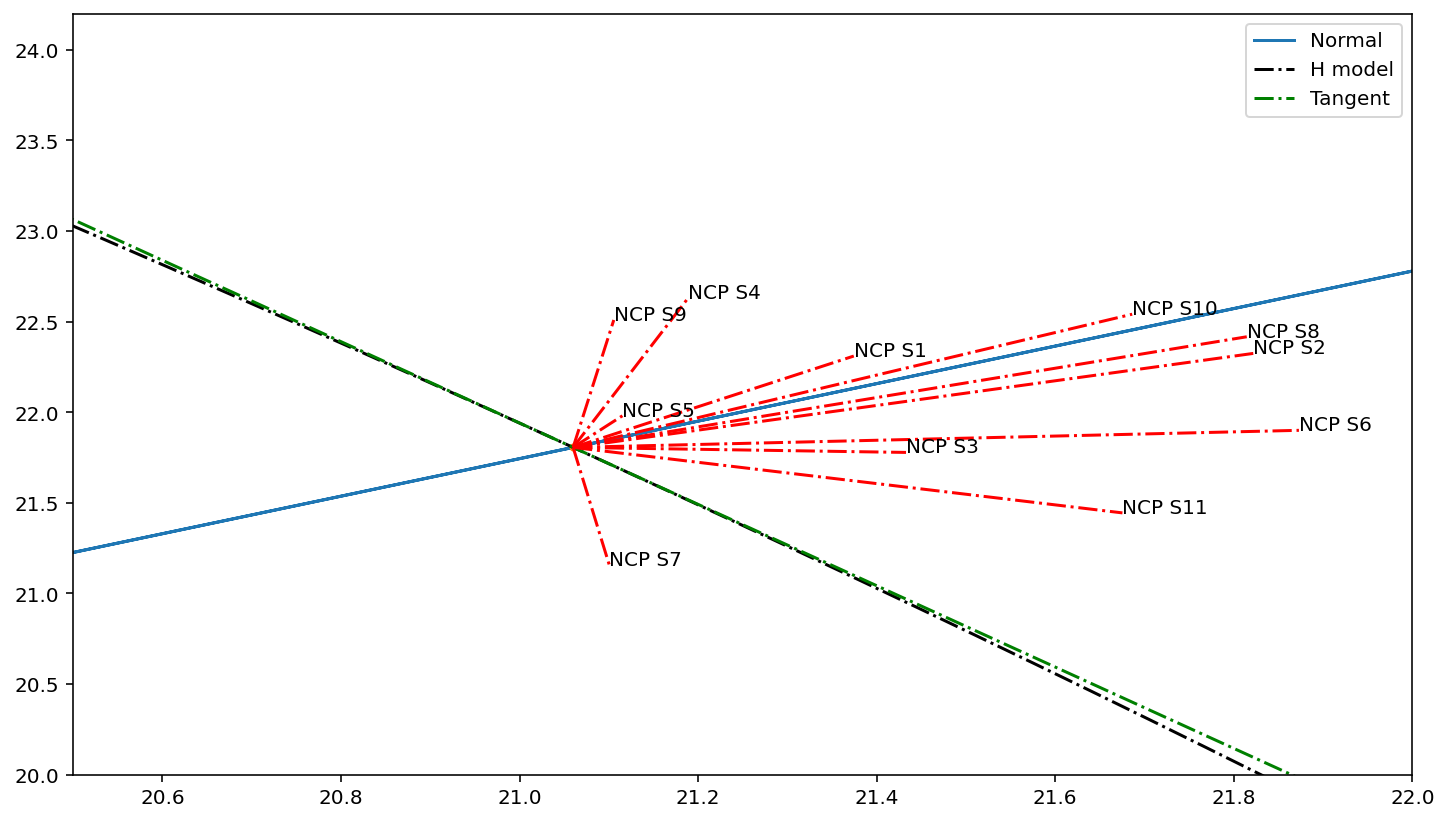

In [15]:
t,st=calCPM(day_data_2004,cross_array,ave_ncp,rho_ncp,std_ncp,srho_ncp)
plt.xlabel(r"$X_{KSM}  \left(R_s\right)$",fontsize = 12)
plt.ylabel(r"$\left(Y_{KSM}^2 + Z_{KSM}^2\right)^{1/2} \left(R_s\right)$",fontsize = 12)
plt.title('A Representation of Norm Vectors (Days 192-211, 2005)',fontsize = 15)
plt.ylim(20,24.2)
plt.xlim(20.5,22)

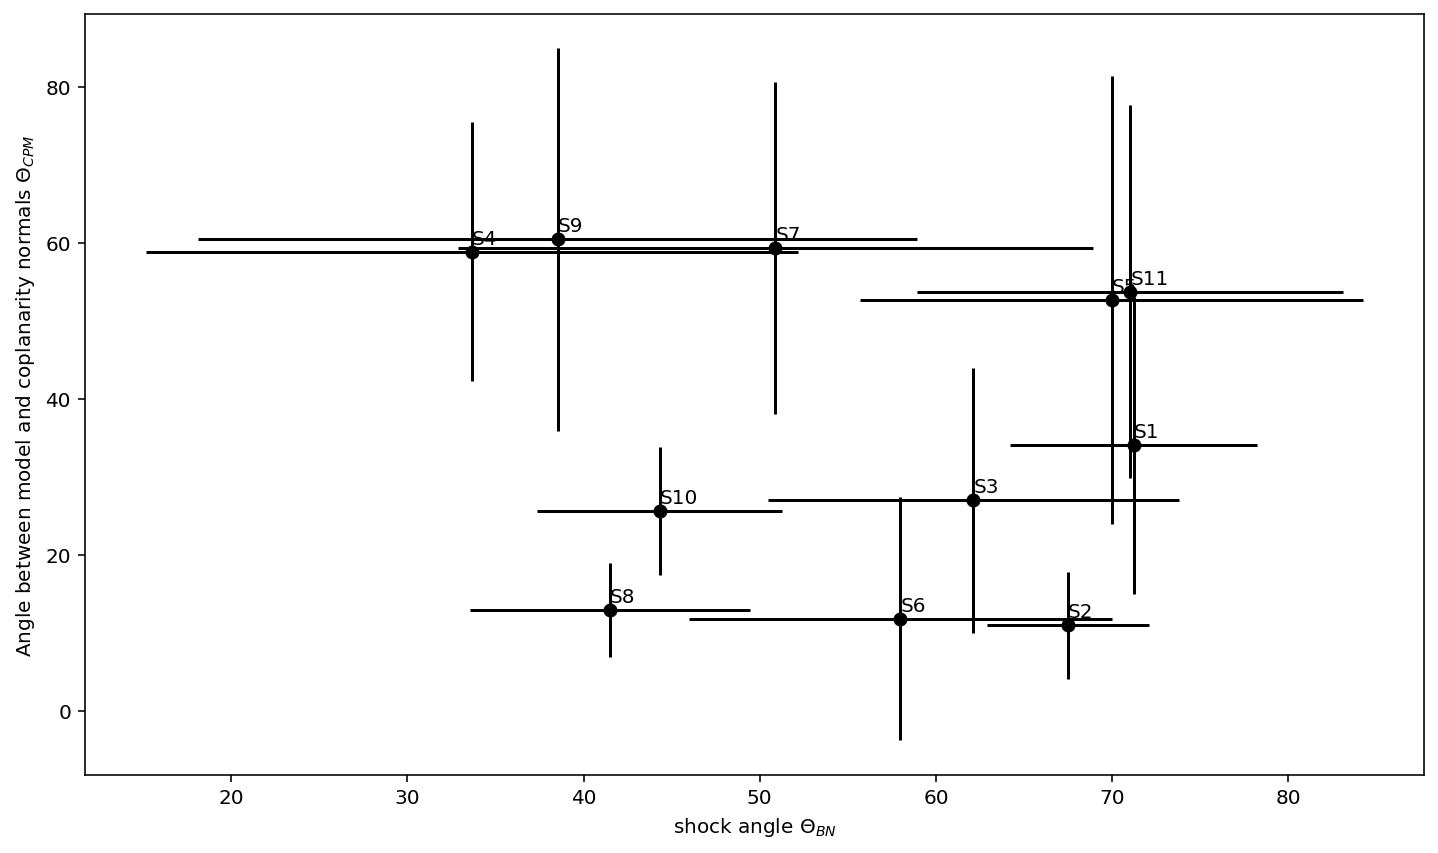

In [16]:
#for i in range(len(st)):
    #st[i]=st[i]/2
    #std[i]=std[i]/2
plt.figure()
plt.plot(ave_shock,t,'.')
plt.xlabel('Shock Angle ${\Theta}_{BN}$',fontsize = 12)
plt.ylabel('Angle Between Model and Co-planarity Normals ${\Theta}_{CPM}$ ',fontsize = 12)
plt.title('Shock Angle ${\Theta}_{BN}$ vs ${\Theta}_{CPM}$ (Days 192-211, 2005)',fontsize = 15)
plt.errorbar(ave_shock,t,xerr=std,yerr=st,fmt='o',color='k')
# plt.ylim(-10,100)
# plt.xlim(0,90 )
for i in range(len(srho_ncp)):
    S='S'+str(i+1)
    plt.annotate(S, (ave_shock[i],t[i]+1) )